In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import plotly.express as px


reset_index

expanding windows

arima in samplefit


In [2]:
column_names = ['series_id', 'year', 'month', 'price', 'drop']

In [3]:
data=pd.read_csv('CUUR0000SAF.txt',sep='\t',header=None, names=column_names)

Food and beverages in U.S. city average, all urban consumers, not seasonally adjusted!

area_code 0

item_code SAF

seasonal U (unadjusted)

periodicity_code R

base_code S

base_period 1982-84=100

In [4]:
data.shape

(737, 5)

In [5]:
data.head(15)

,series_id,year,month,price,drop
0,CUUR0000SAF,1967,M01,34.8,NaN
1,CUUR0000SAF,1967,M02,34.7,NaN
2,CUUR0000SAF,1967,M03,34.7,NaN
3,CUUR0000SAF,1967,M04,34.6,NaN
4,CUUR0000SAF,1967,M05,34.6,NaN
5,CUUR0000SAF,1967,M06,34.9,NaN
6,CUUR0000SAF,1967,M07,35.2,NaN
7,CUUR0000SAF,1967,M08,35.4,NaN
8,CUUR0000SAF,1967,M09,35.2,NaN
9,CUUR0000SAF,1967,M10,35.2,NaN


In [6]:
data=data.drop(data.columns[4],axis=1)

In [7]:
data['month'].values

array(['M01', 'M02', 'M03', 'M04', 'M05', 'M06', 'M07', 'M08', 'M09',
       'M10', 'M11', 'M12', 'M13', 'M01', 'M02', 'M03', 'M04', 'M05',
       'M06', 'M07', 'M08', 'M09', 'M10', 'M11', 'M12', 'M13', 'M01',
       'M02', 'M03', 'M04', 'M05', 'M06', 'M07', 'M08', 'M09', 'M10',
       'M11', 'M12', 'M13', 'M01', 'M02', 'M03', 'M04', 'M05', 'M06',
       'M07', 'M08', 'M09', 'M10', 'M11', 'M12', 'M13', 'M01', 'M02',
       'M03', 'M04', 'M05', 'M06', 'M07', 'M08', 'M09', 'M10', 'M11',
       'M12', 'M13', 'M01', 'M02', 'M03', 'M04', 'M05', 'M06', 'M07',
       'M08', 'M09', 'M10', 'M11', 'M12', 'M13', 'M01', 'M02', 'M03',
       'M04', 'M05', 'M06', 'M07', 'M08', 'M09', 'M10', 'M11', 'M12',
       'M13', 'M01', 'M02', 'M03', 'M04', 'M05', 'M06', 'M07', 'M08',
       'M09', 'M10', 'M11', 'M12', 'M13', 'M01', 'M02', 'M03', 'M04',
       'M05', 'M06', 'M07', 'M08', 'M09', 'M10', 'M11', 'M12', 'M13',
       'M01', 'M02', 'M03', 'M04', 'M05', 'M06', 'M07', 'M08', 'M09',
       'M10', 'M11',

In [8]:
condition = data['month'] == 'M13'
data = data[~condition]
data.head(20)

,series_id,year,month,price
0,CUUR0000SAF,1967,M01,34.8
1,CUUR0000SAF,1967,M02,34.7
2,CUUR0000SAF,1967,M03,34.7
3,CUUR0000SAF,1967,M04,34.6
4,CUUR0000SAF,1967,M05,34.6
5,CUUR0000SAF,1967,M06,34.9
6,CUUR0000SAF,1967,M07,35.2
7,CUUR0000SAF,1967,M08,35.4
8,CUUR0000SAF,1967,M09,35.2
9,CUUR0000SAF,1967,M10,35.2


In [9]:
data['inflation'] = (data['price']-data['price'].shift(12).where(data['month'] == data['month'].shift(12)))/data['price'].shift(13).where(data['month'] == data['month'].shift(12))*100

data.loc[data['year'] == 1967, 'inflation'] = np.nan

data.head(20)

,series_id,year,month,price,inflation
0,CUUR0000SAF,1967,M01,34.8,NaN
1,CUUR0000SAF,1967,M02,34.7,NaN
2,CUUR0000SAF,1967,M03,34.7,NaN
3,CUUR0000SAF,1967,M04,34.6,NaN
4,CUUR0000SAF,1967,M05,34.6,NaN
5,CUUR0000SAF,1967,M06,34.9,NaN
6,CUUR0000SAF,1967,M07,35.2,NaN
7,CUUR0000SAF,1967,M08,35.4,NaN
8,CUUR0000SAF,1967,M09,35.2,NaN
9,CUUR0000SAF,1967,M10,35.2,NaN


In [10]:
data['month']=data['month'].astype(str)
data['month']=data['month'].str.strip('M')

In [11]:
data['formatted_months'] = [str(month).zfill(2) for month in data['month']]

data.head(15)

,series_id,year,month,price,inflation,formatted_months
0,CUUR0000SAF,1967,01,34.8,NaN,01
1,CUUR0000SAF,1967,02,34.7,NaN,02
2,CUUR0000SAF,1967,03,34.7,NaN,03
3,CUUR0000SAF,1967,04,34.6,NaN,04
4,CUUR0000SAF,1967,05,34.6,NaN,05
5,CUUR0000SAF,1967,06,34.9,NaN,06
6,CUUR0000SAF,1967,07,35.2,NaN,07
7,CUUR0000SAF,1967,08,35.4,NaN,08
8,CUUR0000SAF,1967,09,35.2,NaN,09
9,CUUR0000SAF,1967,10,35.2,NaN,10


In [12]:
data['month']=data['formatted_months']
data.head(15)

,series_id,year,month,price,inflation,formatted_months
0,CUUR0000SAF,1967,01,34.8,NaN,01
1,CUUR0000SAF,1967,02,34.7,NaN,02
2,CUUR0000SAF,1967,03,34.7,NaN,03
3,CUUR0000SAF,1967,04,34.6,NaN,04
4,CUUR0000SAF,1967,05,34.6,NaN,05
5,CUUR0000SAF,1967,06,34.9,NaN,06
6,CUUR0000SAF,1967,07,35.2,NaN,07
7,CUUR0000SAF,1967,08,35.4,NaN,08
8,CUUR0000SAF,1967,09,35.2,NaN,09
9,CUUR0000SAF,1967,10,35.2,NaN,10


In [13]:
data=data.drop(data.columns[5],axis=1)
data.head(15)

,series_id,year,month,price,inflation
0,CUUR0000SAF,1967,01,34.8,NaN
1,CUUR0000SAF,1967,02,34.7,NaN
2,CUUR0000SAF,1967,03,34.7,NaN
3,CUUR0000SAF,1967,04,34.6,NaN
4,CUUR0000SAF,1967,05,34.6,NaN
5,CUUR0000SAF,1967,06,34.9,NaN
6,CUUR0000SAF,1967,07,35.2,NaN
7,CUUR0000SAF,1967,08,35.4,NaN
8,CUUR0000SAF,1967,09,35.2,NaN
9,CUUR0000SAF,1967,10,35.2,NaN


In [14]:
data['date'] = data['year'].astype(str) + '-' + data['month'].astype(str)

print(data.head(15))

            series_id  year month  price  inflation     date
0   CUUR0000SAF        1967    01   34.8        NaN  1967-01
1   CUUR0000SAF        1967    02   34.7        NaN  1967-02
2   CUUR0000SAF        1967    03   34.7        NaN  1967-03
3   CUUR0000SAF        1967    04   34.6        NaN  1967-04
4   CUUR0000SAF        1967    05   34.6        NaN  1967-05
5   CUUR0000SAF        1967    06   34.9        NaN  1967-06
6   CUUR0000SAF        1967    07   35.2        NaN  1967-07
7   CUUR0000SAF        1967    08   35.4        NaN  1967-08
8   CUUR0000SAF        1967    09   35.2        NaN  1967-09
9   CUUR0000SAF        1967    10   35.2        NaN  1967-10
10  CUUR0000SAF        1967    11   35.2        NaN  1967-11
11  CUUR0000SAF        1967    12   35.3        NaN  1967-12
13  CUUR0000SAF        1968    01   35.6        NaN  1968-01
14  CUUR0000SAF        1968    02   35.7   2.873563  1968-02
15  CUUR0000SAF        1968    03   35.8   3.170029  1968-03


In [15]:
print(data[120:])

             series_id  year month    price  inflation     date
130  CUUR0000SAF        1977    01   62.900   1.615509  1977-01
131  CUUR0000SAF        1977    02   64.300   4.200323  1977-02
132  CUUR0000SAF        1977    03   64.600   5.348460  1977-03
133  CUUR0000SAF        1977    04   65.300   6.199021  1977-04
134  CUUR0000SAF        1977    05   65.600   6.178862  1977-05
..                 ...   ...   ...      ...        ...      ...
732  CUUR0000SAF        2023    05  319.811   6.644999  2023-05
733  CUUR0000SAF        2023    06  320.120   5.716123  2023-06
734  CUUR0000SAF        2023    07  321.020   4.865876  2023-07
735  CUUR0000SAF        2023    08  321.578   4.253652  2023-08
736  CUUR0000SAF        2023    09  322.249   3.750122  2023-09

[561 rows x 6 columns]


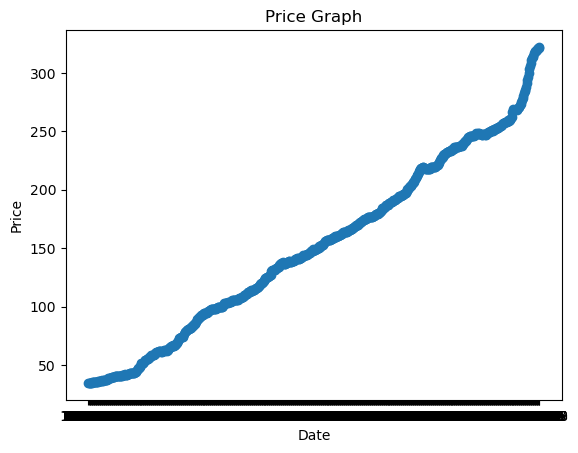

In [16]:
plt.scatter(data['date'], data['price'])
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Price Graph")
plt.show()

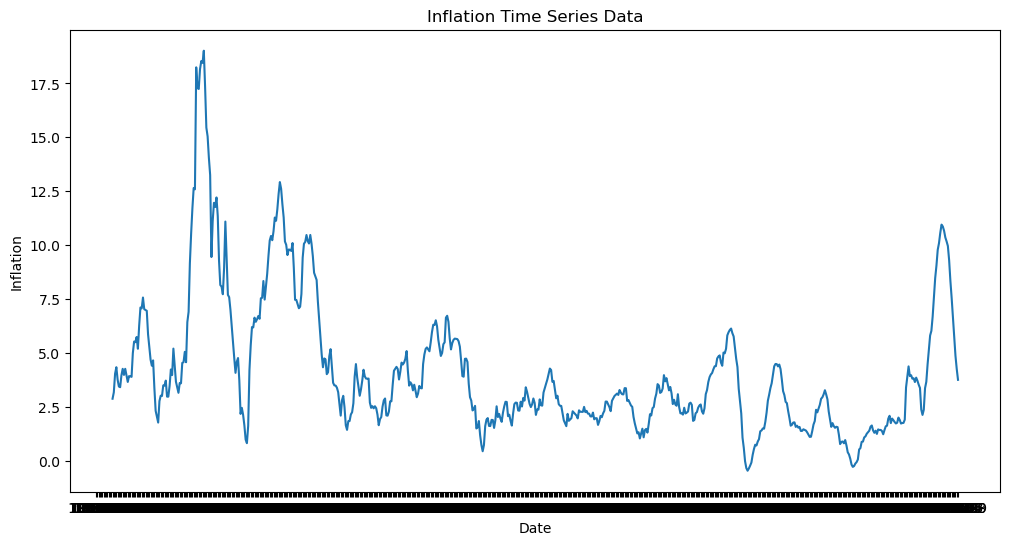

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(data['date'],data['inflation'])
plt.title('Inflation Time Series Data')
plt.xlabel('Date')
plt.ylabel('Inflation')
plt.show()

In [18]:
fig = px.line(data, x='date', y='inflation', title='Inflation Time Series Data',
              labels={'inflation': 'Inflation', 'date': 'Date'})

fig.show()


In [19]:
data=data.dropna(axis=0)

In [20]:
data.head(15)

,series_id,year,month,price,inflation,date
14,CUUR0000SAF,1968,02,35.7,2.873563,1968-02
15,CUUR0000SAF,1968,03,35.8,3.170029,1968-03
16,CUUR0000SAF,1968,04,36.0,4.034582,1968-04
17,CUUR0000SAF,1968,05,36.1,4.335260,1968-05
18,CUUR0000SAF,1968,06,36.2,3.757225,1968-06
19,CUUR0000SAF,1968,07,36.4,3.438395,1968-07
20,CUUR0000SAF,1968,08,36.6,3.409091,1968-08
21,CUUR0000SAF,1968,09,36.6,3.954802,1968-09
22,CUUR0000SAF,1968,10,36.7,4.261364,1968-10
23,CUUR0000SAF,1968,11,36.6,3.977273,1968-11


In [21]:
correlation = data['price'].corr(data['inflation'])
print(correlation)

-0.3978494148277586


In [22]:
time_series=data[['date','inflation']]
time_series['date']=pd.to_datetime(time_series['date'])
time_series.head(15)

/var/folders/8q/hyqzpcrx357g9qd6yqfg924h0000gn/T/ipykernel_4015/1823769846.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,date,inflation
14,1968-02-01,2.873563
15,1968-03-01,3.170029
16,1968-04-01,4.034582
17,1968-05-01,4.335260
18,1968-06-01,3.757225
19,1968-07-01,3.438395
20,1968-08-01,3.409091
21,1968-09-01,3.954802
22,1968-10-01,4.261364
23,1968-11-01,3.977273


In [23]:
time_series.reset_index(drop=True, inplace=True)

In [24]:
time_series.head(15)

,date,inflation
0,1968-02-01,2.873563
1,1968-03-01,3.170029
2,1968-04-01,4.034582
3,1968-05-01,4.335260
4,1968-06-01,3.757225
5,1968-07-01,3.438395
6,1968-08-01,3.409091
7,1968-09-01,3.954802
8,1968-10-01,4.261364
9,1968-11-01,3.977273


In [25]:
time_series.to_csv('inflation_time_series.csv')